In [153]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", palette="Paired")
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv


/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv

In [154]:
data = pd.read_csv('../input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv', encoding = "ISO-8859-1")
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


Text(0.5, 0, 'Medals won by all the countries over the years')

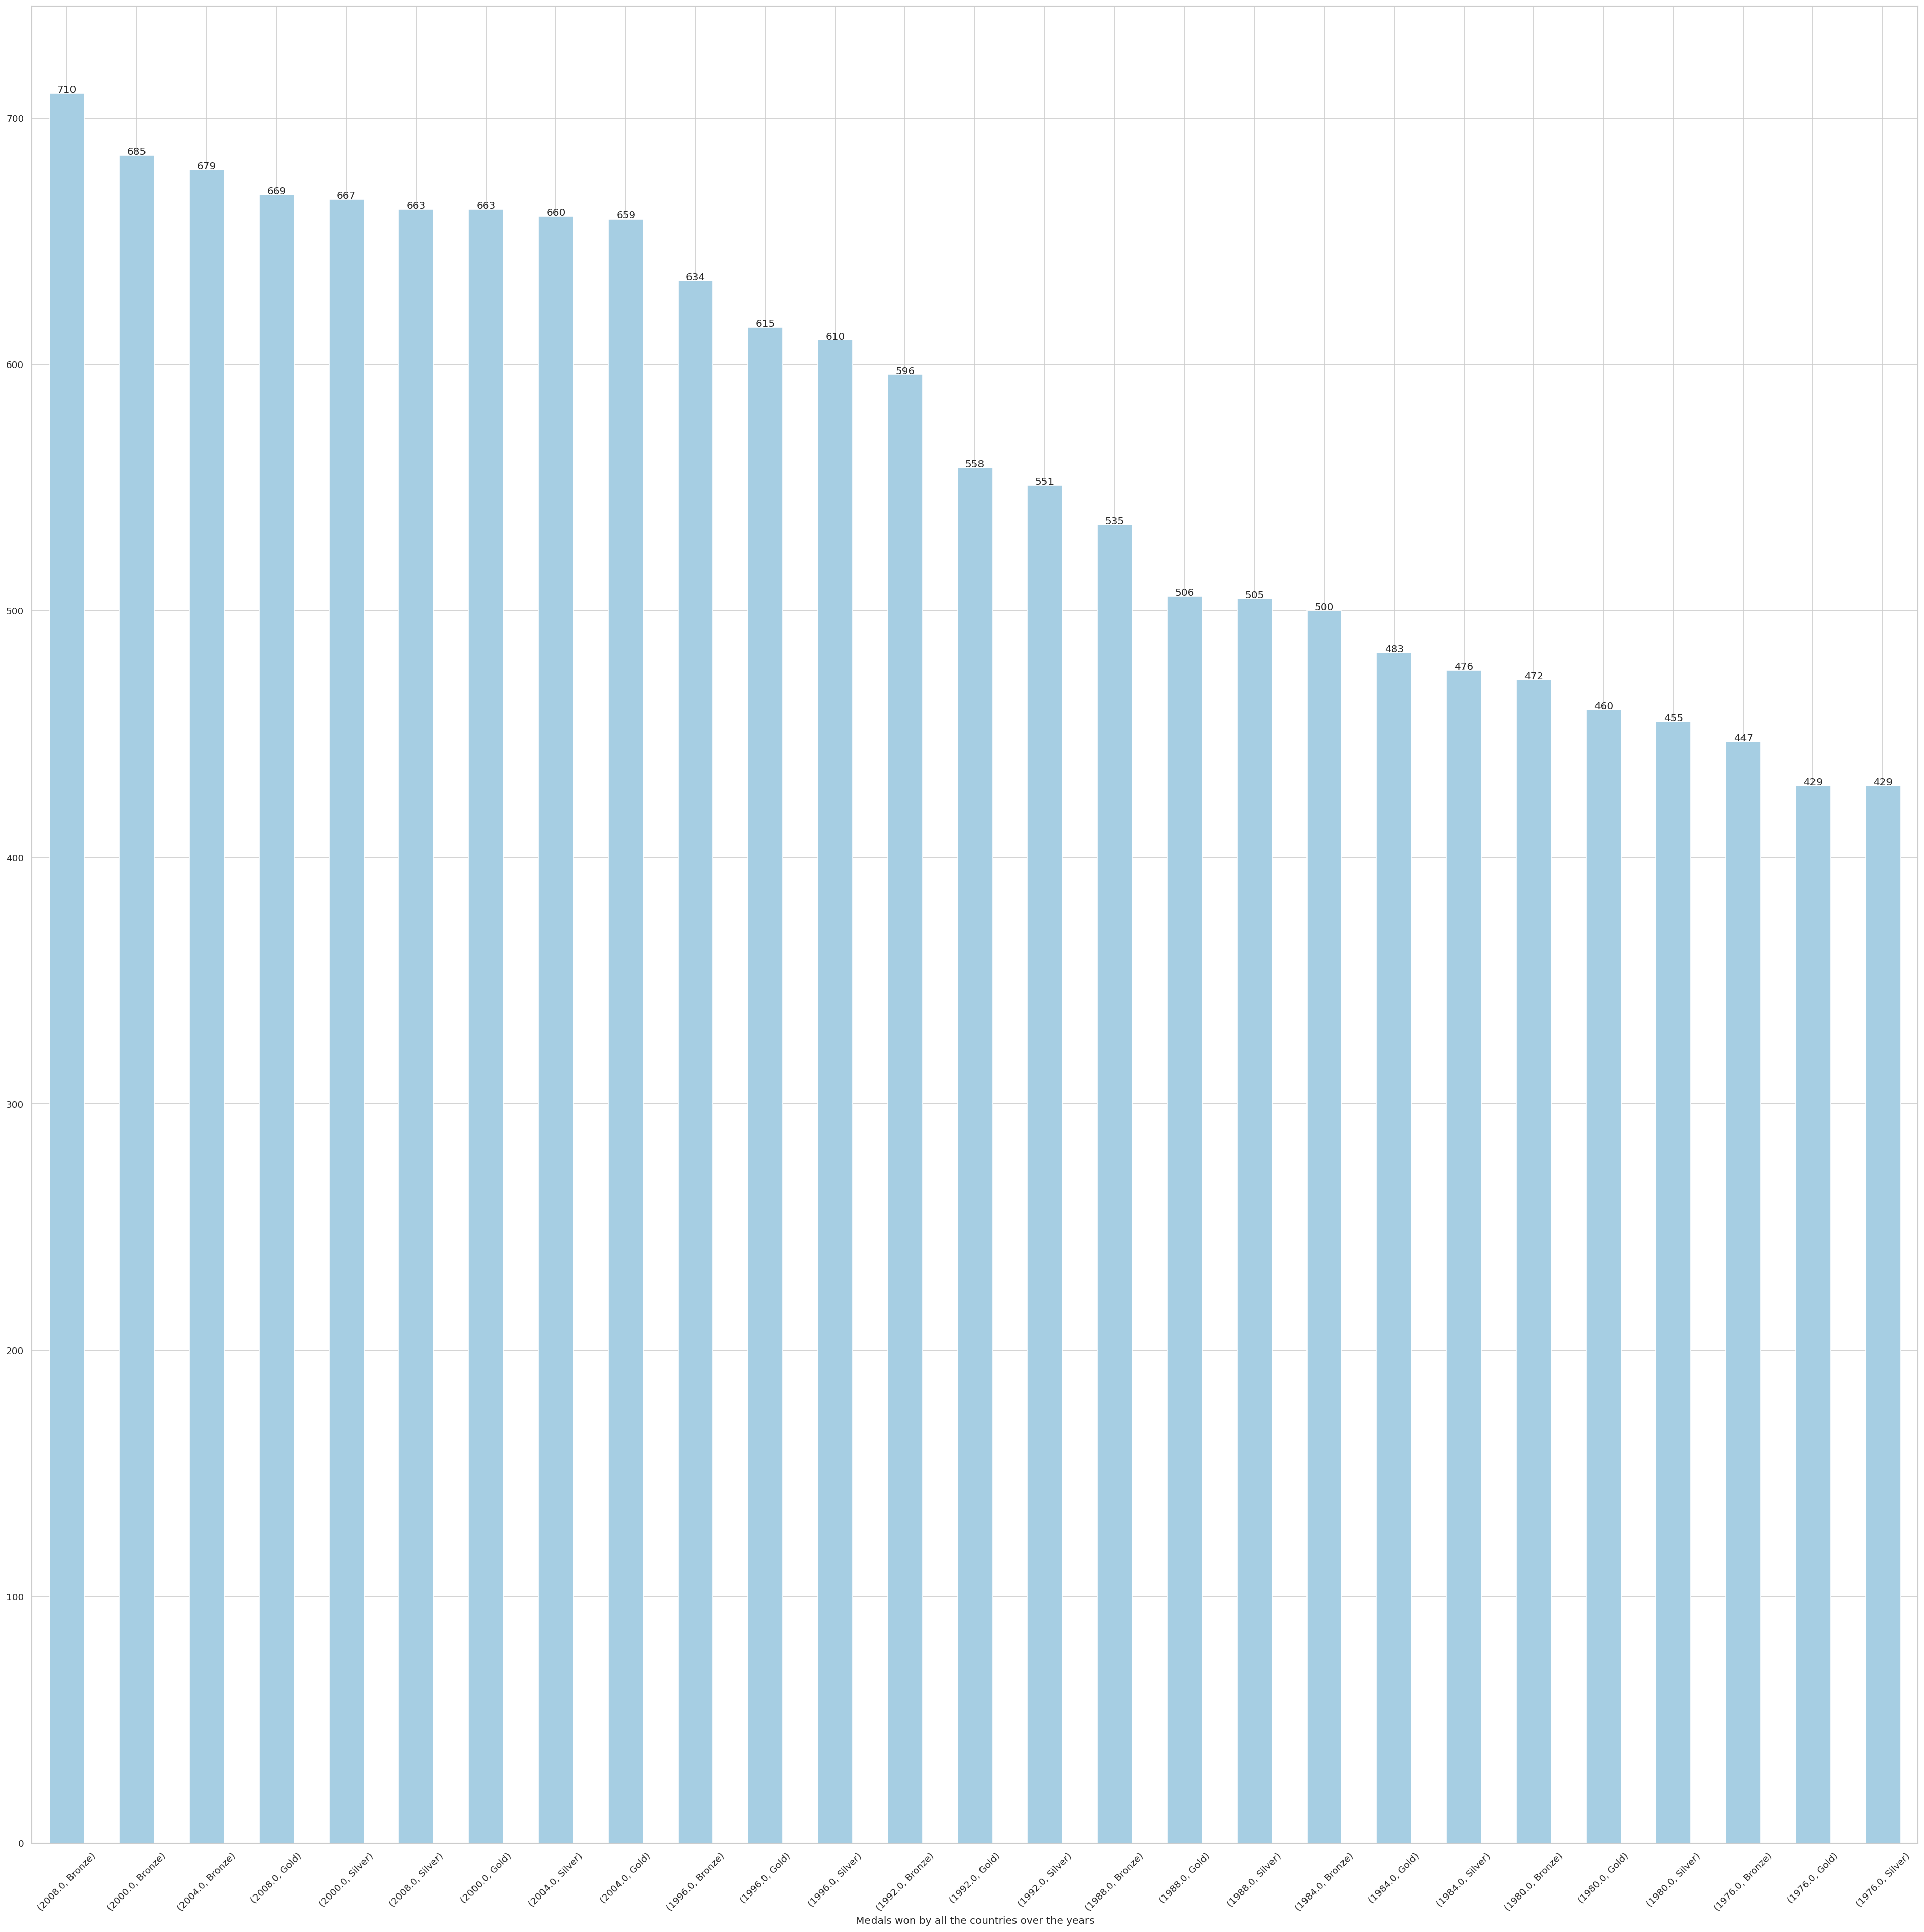

In [209]:
Over_years=data.groupby(['Year','Medal']).Medal.size()
All_Over_years = Over_years.sort_values(ascending = False)[:]
All_Over_years_bar = All_Over_years.plot.bar(figsize=[40,40])
for p in All_Over_years_bar.patches:
    All_Over_years_bar.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width()/2.0, 
                         p.get_height()), 
                         ha = 'center', 
                         va = 'center', 
                         xytext = (0, 4),
                         textcoords = 'offset points')
plt.xticks(rotation=45)
plt.xlabel('Medals won by all the countries over the years')

Text(0.5, 0, 'Top 3 countries with Gold Medals')

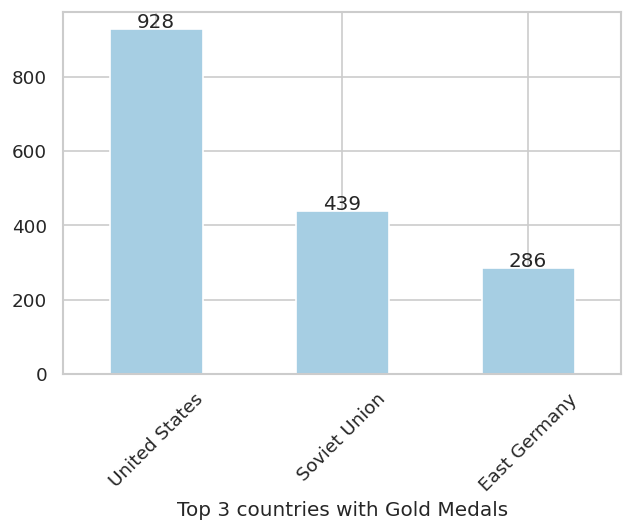

In [156]:
gold_country=data[data.Medal == 'Gold'].groupby(['Country']).Medal.size()
top_3_gold_country = gold_country.sort_values(ascending = False)[:3]
top_3_gold_country_bar = top_3_gold_country.plot.bar()
for p in top_3_gold_country_bar.patches:
    top_3_gold_country_bar.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                         ha = 'center', 
                         va = 'center', 
                         xytext = (0, 4),
                         textcoords = 'offset points')
plt.xticks(rotation=45)
plt.xlabel('Top 3 countries with Gold Medals')

Text(0.5, 0, 'Top athletes with most number of Medals')

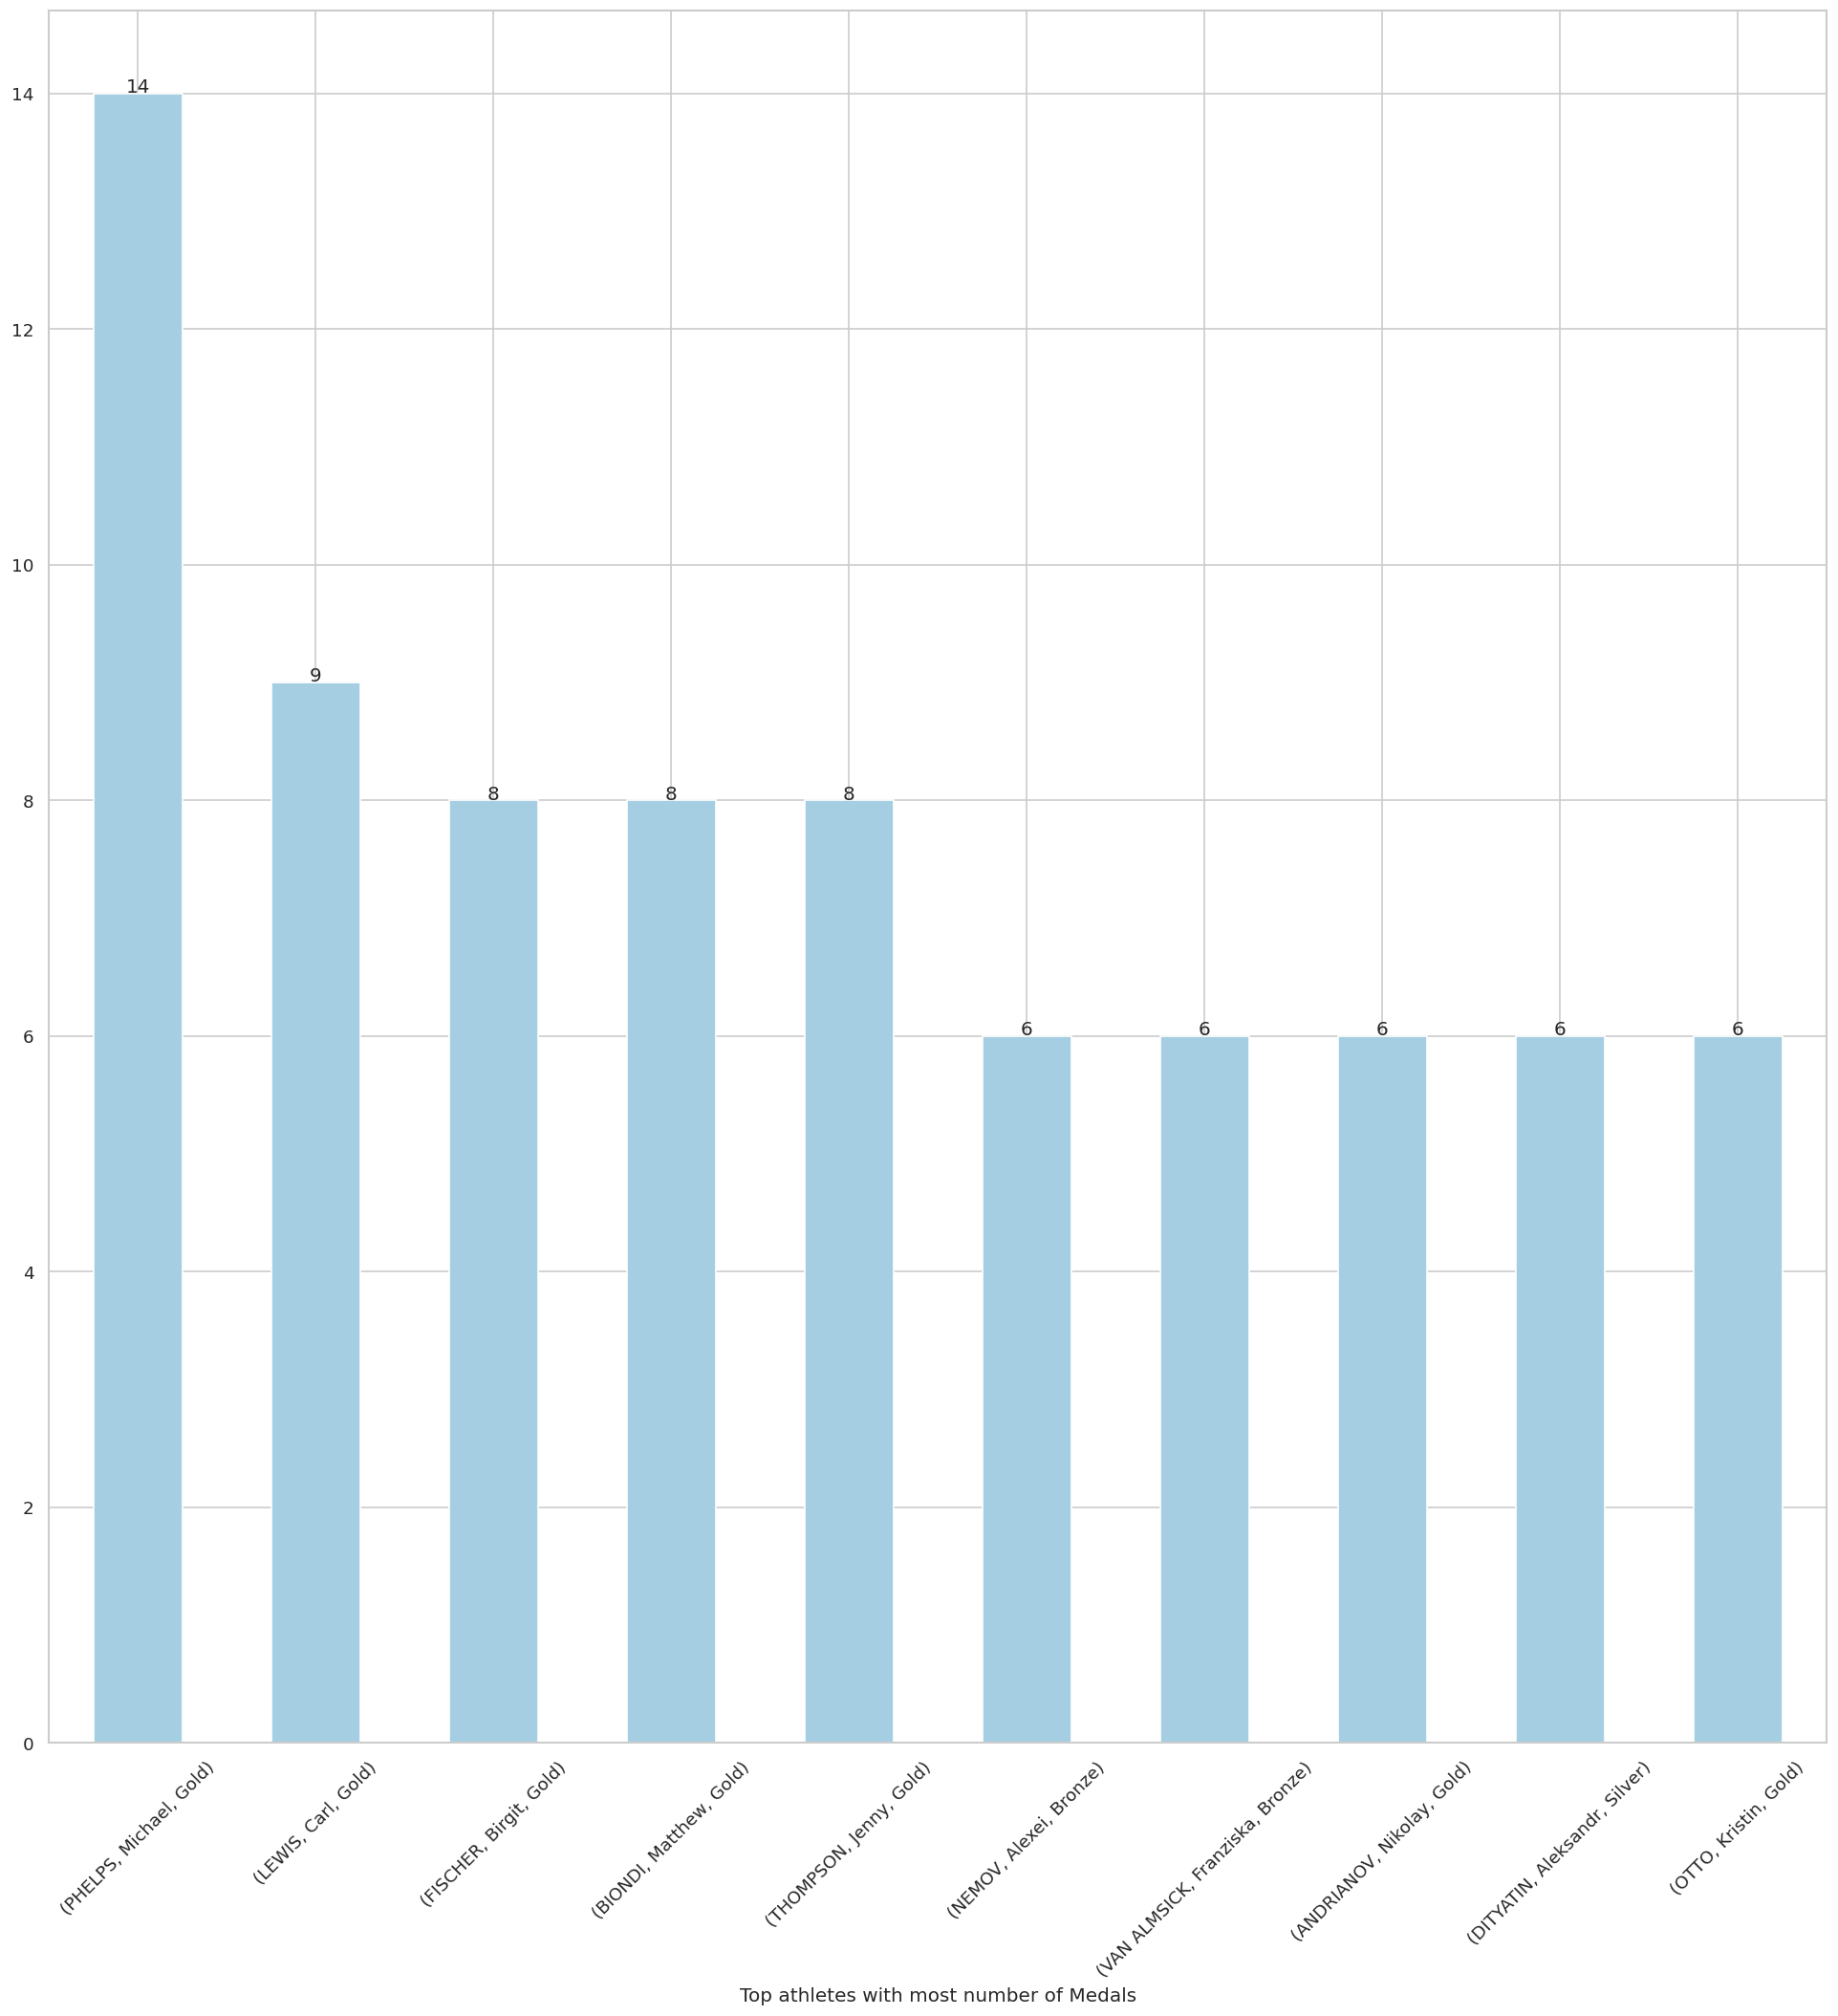

In [211]:
Top_athletes=data.groupby(['Athlete','Medal']).Medal.size()
Top_athletes_country = Top_athletes.sort_values(ascending = False)[:10]
Top_athletes_country_bar = Top_athletes_country.plot.bar(figsize=[20,20])
for p in Top_athletes_country_bar.patches:
    Top_athletes_country_bar.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                         ha = 'center', 
                         va = 'center', 
                         xytext = (0,4),
                         textcoords = 'offset points')
plt.xticks(rotation=45)
plt.xlabel('Top athletes with most number of Medals')
          